* Extremely fast & Simple classification mechanism
* Suitable for very high-dimension datasets
* Since, it is fast & have few tuneable parameters, we can quickly get quick-dirty results

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

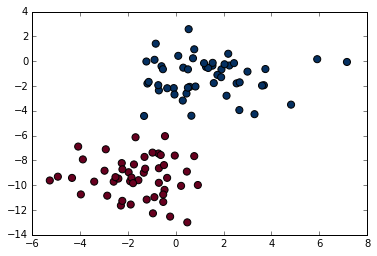

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [3]:
# Using GaussianNB for classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

In [5]:
ynew = model.predict(Xnew)

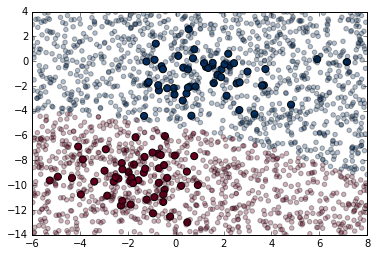

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim);

### Multinomial Naive Bayes
* Describes the probability of observing counts among a number of categories 
* Most appropiate for features that represents count or count rates

#### Classifying Text
* Multinomial NV is suitable here
* In applications where features are related to word counts or frequencies within doc to be classified

In [11]:
from sklearn.datasets import fetch_20newsgroups

In [12]:
data = fetch_20newsgroups()

In [13]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [14]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']

In [15]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [17]:
train.data

[u"From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\nSubject: Re: Losing your temper is not a Christian trait\nOrganization: Motorola LPA Development\nLines: 26\n\nIn article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com\n(jcj) wrote:\n\n> I'd like to remind people of the withering of the fig tree and Jesus\n> driving the money changers et. al. out of the temple.  I think those\n> were two instances of Christ showing anger (as part of His human side).\n> \nYes, and what about Paul saying:\n\n26 Be ye angry, and sin not: let not the sun go down upon your wrath:\n(Ephesians 4:26).\n\nObviously then, we can be angry w/o sinning.\n\nJon\n\n------------------------------------------------\nJon Ogden         - jono@mac-ak-24.rtsg.mot.com\nMotorola Cellular - Advanced Products Division\nVoice: 708-632-2521      Data: 708-632-6086\n------------------------------------------------\n\nThey drew a circle and shut him out.\nHeretic, Rebel, a thing to flout.\nBut Love and I had the w

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [19]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smoo...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [20]:
labels = model.predict(test.data)

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

In [22]:
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]])

* Well seperated categories
* high dimension data

In [23]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [32]:
predict_category('win the race')

'sci.space'

In [25]:
predict_category('i love jesus')

'soc.religion.christian'

In [26]:
predict_category('zero gravity')

'sci.space'

In [31]:
predict_category('sending payload to airship')

'sci.space'